In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop

WINDOW_SIZE = 5
SEQUENCE_LENGTH = 1
N_FEATURES = 6
N_EPOCHS = 100

# Load data
raw = pd.read_csv('sales_train.csv')
raw['date'] = pd.to_datetime(raw['date'], format='%d.%m.%Y')
raw = raw.sort_values(by=['date']).groupby(['date']).sum()['item_cnt_day'].to_frame()


Using TensorFlow backend.


In [5]:
data = pd.read_csv('bitcoin-train.csv')


In [25]:
test =pd.read_csv('bitcoin-test.csv')
test=test.iloc[::-1]

In [28]:
test.index=pd.date_range('2017-04-01','2017-4-07')

In [49]:
test=test.drop(['Date','Volume','Market Cap'],axis=1)

In [15]:
data=data.iloc[::-1]

In [17]:
data.index=pd.date_range('2013-04-28','2017-7-31')

In [50]:
data=data.drop(['Date','Volume','Market Cap'],axis=1)

In [35]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [51]:
train_y=data['High']
test_y=test['High']
test_x=test.drop(['High'],axis=1)
train_x=data.drop(['High'],axis=1)

In [52]:
x_scaler = MinMaxScaler().fit(data['High'].reshape(-1, 1))
train_y = x_scaler.transform(train_y.reshape(-1, 1)).reshape(-1,)
test_y = x_scaler.transform(test_y.reshape(-1, 1)).reshape(-1,)


In [54]:
col=[ 'Open', 'Low', 'Close']
for c in col:
    train_x[c] = x_scaler.transform(train_x[c].reshape(1, -1)).reshape(-1,)
    test_x[c] = x_scaler.transform(test_x[c].reshape(1, -1)).reshape(-1,)

In [56]:
train_x=np.array(train_x).reshape(-1,3,1)

In [58]:
model = Sequential()
model.add(LSTM(8, input_shape=train_x[0].shape))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Train
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mae'])

history = model.fit(train_x, train_y, batch_size=16, epochs=N_EPOCHS, verbose=2)

Epoch 1/100
 - 1s - loss: 0.1120 - mean_absolute_error: 0.3186
Epoch 2/100
 - 0s - loss: 0.0605 - mean_absolute_error: 0.2164
Epoch 3/100
 - 0s - loss: 0.0350 - mean_absolute_error: 0.1400
Epoch 4/100
 - 0s - loss: 0.0235 - mean_absolute_error: 0.1108
Epoch 5/100
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0875
Epoch 6/100
 - 0s - loss: 0.0101 - mean_absolute_error: 0.0708
Epoch 7/100
 - 0s - loss: 0.0081 - mean_absolute_error: 0.0615
Epoch 8/100
 - 0s - loss: 0.0063 - mean_absolute_error: 0.0563
Epoch 9/100
 - 0s - loss: 0.0061 - mean_absolute_error: 0.0571
Epoch 10/100
 - 0s - loss: 0.0056 - mean_absolute_error: 0.0539
Epoch 11/100
 - 0s - loss: 0.0057 - mean_absolute_error: 0.0531
Epoch 12/100
 - 0s - loss: 0.0061 - mean_absolute_error: 0.0537
Epoch 13/100
 - 1s - loss: 0.0053 - mean_absolute_error: 0.0522
Epoch 14/100
 - 0s - loss: 0.0054 - mean_absolute_error: 0.0510
Epoch 15/100
 - 1s - loss: 0.0055 - mean_absolute_error: 0.0504
Epoch 16/100
 - 1s - loss: 0.0053 - mean_absolute

In [59]:
y_pred = model.predict(np.array(test_x).reshape(-1,3,1))
test_pred = x_scaler.inverse_transform(y_pred.reshape(1, -1)).reshape(-1,)
test_true = x_scaler.inverse_transform(test_y.reshape(1, -1)).reshape(-1,)

In [61]:
test_MSE=np.mean((test_true- test_pred)**2)
MSE = ((test_true-test_pred)**2).sum()/test_true.size
RMSE = np.sqrt(((test_true-test_pred)**2).sum()/test_true.size)
MAE= (np.abs(test_true-test_pred)).sum()/test_true.size
MAPE=(np.abs(test_true-test_pred)*100/test_true).sum()/test_true.size
print(MSE)
print(RMSE)
print(MAE)
print(MAPE)

165527.4984877599
406.85070786193785
360.5557338169642
11.394029269551362


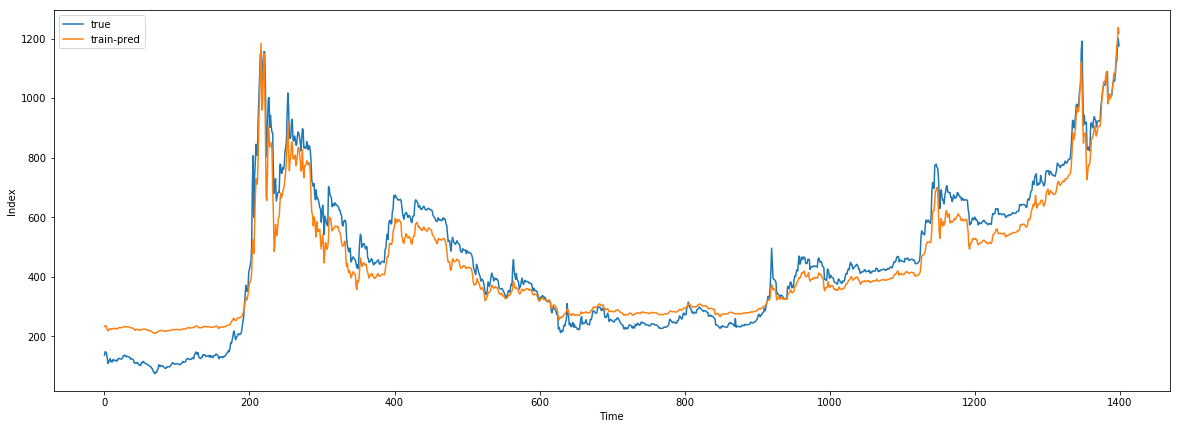

In [63]:
train_pred = model.predict(np.array(train_x).reshape(-1,3,1))
train_pred=x_scaler.inverse_transform(train_pred.reshape(1, -1)).reshape(-1,)
train_true =x_scaler.inverse_transform(train_y.reshape(1, -1)).reshape(-1,)
plt.figure(figsize=(20, 7))
plt.xlabel('Time')
plt.ylabel('Index')

plt.plot(train_true[:1400], label='true')
plt.plot(train_pred[:1400], label='train-pred')
plt.legend()
plt.show()

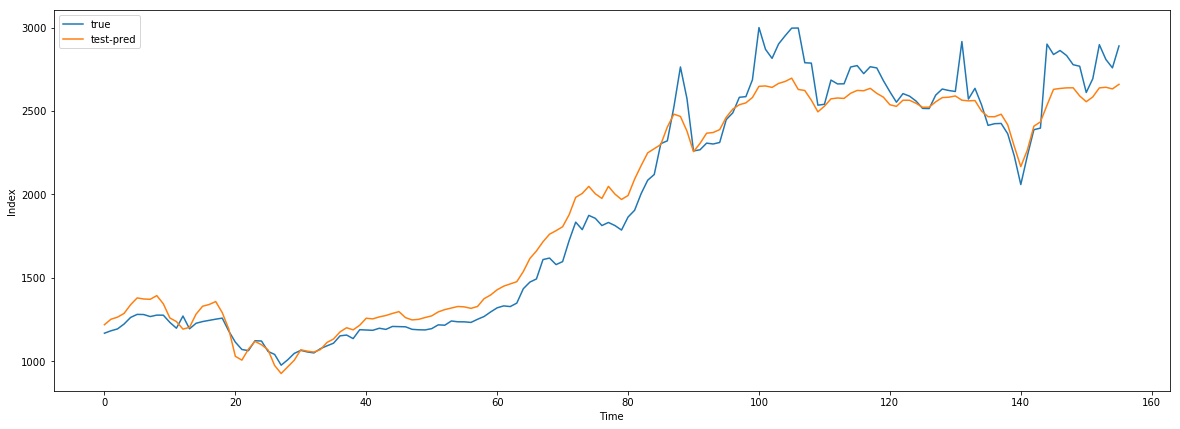

In [66]:
train_pred = model.predict(np.array(train_x).reshape(-1,3,1))
train_pred=x_scaler.inverse_transform(train_pred.reshape(1, -1)).reshape(-1,)
train_true =x_scaler.inverse_transform(train_y.reshape(1, -1)).reshape(-1,)
plt.figure(figsize=(20, 7))
plt.xlabel('Time')
plt.ylabel('Index')

plt.plot(train_true[1400:], label='true')
plt.plot(train_pred[1400:], label='test-pred')
plt.legend()
plt.show()